In [ ]:
# DRAFT - Proof of Concept to identify vulnerable locations in Alameda County using CDC 
# Social Vulnerabilty Index Data
#List of constructs:
    # Will need to be done as a ratio of ratios, agregating up from tracts 
    # to determine corraltions to outbreaks and county characteristics. Preliminary 
    # constructs will include:
        # Ratio of Senoirs by tract
        # Hospitals (to determine reporting capbilities from test centers)
        # Ethnic composition by tract
        # Income level
        # Education attainment
        # Industry composition
        # Population density
        # Travel data
    # Can be used to target tracts that may be more vulnerable to contagion
    # Use CDC Social Vulnerabilty Index at County level to identify determinants
    # and then find same conditions at census tract areas in Alameda County?
    # Bad practice to generalize aggregate to more granular geographies?
    # Data Dictionary: https://svi.cdc.gov/Documents/Data/2018_SVI_Data/SVI2018Documentation.pdf

In [3]:
# import modules

import pandas as pd
import numpy as np
import os

In [40]:
# read Social vulnerability and covid data into pandas

df = pd.read_csv(r"C:\Users\jsobryan\OneDrive\Desktop\Temp out\EOC\Cnty_SIV2018_Covid20200323_NoMOE_10_250.csv")

df.head(5)

,OBJECTID_1,ST_ABBR,COUNTY,FIPS,AREA_SQMI,E_TOTPOP,M_TOTPOP,E_HU,E_HH,E_POV,...,EP_UNINSUR,MP_UNINSUR,E_DAYPOP,Last_Updat,Confirmed,Deaths,Recovered,Active,Cases_by_Pop,Death_by_Pop
0,2502,FL,Broward,12011,1203.103962,1909151,0,821088,682088,255214,...,14.6,0.3,1521986,3/23/2020 23:19,263,3,0,0,0.000138,1.571000e-06
1,2372,TN,Davidson,47037,503.489621,684017,0,305849,277903,108515,...,12.6,0.4,720182,3/23/2020 23:19,164,2,0,0,0.000240,2.924000e-06
2,2925,TX,Dallas,48113,872.055717,2586552,0,998874,917276,423899,...,21.0,0.3,2623146,3/23/2020 23:19,155,4,0,0,0.000060,1.546000e-06
3,2335,OH,Cuyahoga,39035,457.184835,1253783,0,618792,538531,221899,...,6.0,0.2,1277794,3/23/2020 23:19,149,1,0,0,0.000119,7.980000e-07
4,2497,CO,Denver,8031,153.292030,693417,0,314045,294358,93728,...,10.3,0.3,700195,3/23/2020 23:19,148,0,0,0,0.000213,0.000000e+00


In [41]:
df['Confirmed'].describe()

count     77.000000
mean      45.545455
std       45.503772
min       10.000000
25%       17.000000
50%       31.000000
75%       54.000000
max      263.000000
Name: Confirmed, dtype: float64

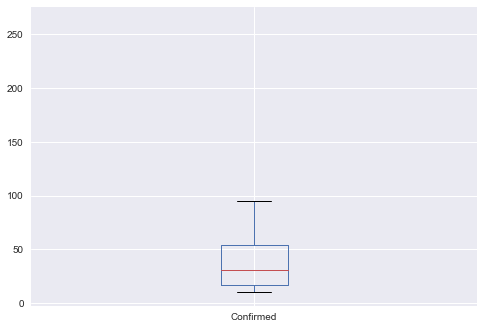

In [42]:
df.boxplot('Confirmed')

In [8]:

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import re

from sklearn.model_selection import cross_val_score
from sklearn import (
    metrics, 
    linear_model, 
    ensemble,
)

from sklearn.linear_model import LinearRegression
from sklearn import feature_selection

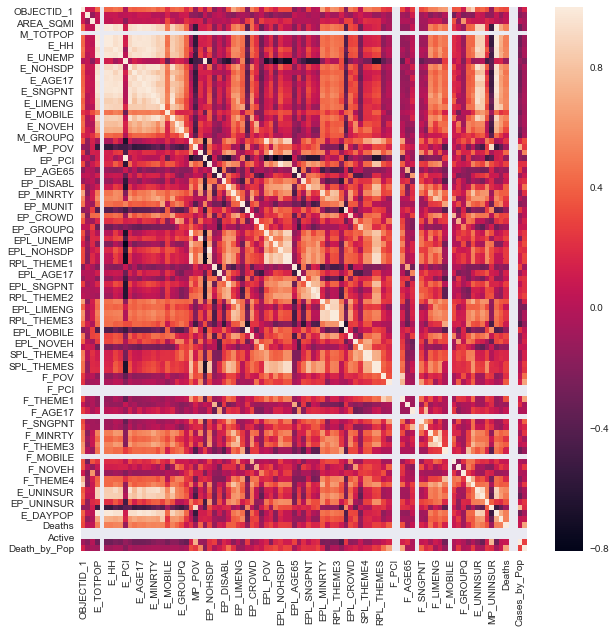

In [43]:
fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(df.corr(), ax=ax)

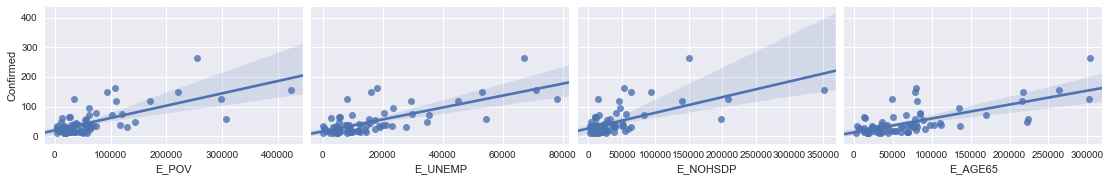

In [44]:

# more exploratory analysis, scatterplots

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')


g = sns.pairplot(df, x_vars=['E_POV', 'E_UNEMP', 'E_NOHSDP', 'E_AGE65'], y_vars='Confirmed',  height=15, aspect=0.7, kind='reg')


g.fig.set_size_inches(15,2)